In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Understanding

In [3]:
degrees = pd.read_csv('degrees-that-pay-back.csv')
degrees.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [4]:
# Renaming the columns so as to make it easier to access them
degrees.columns = ['major', 'bgn_median','mid_median','delta_bgn_mid','mid_p10','mid_p25','mid_p75','mid_p90']
degrees.head()

,major,bgn_median,mid_median,delta_bgn_mid,mid_p10,mid_p25,mid_p75,mid_p90
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [5]:
# Creating a copy of the original dataframe to manipulate and use for analysis
df_deg = degrees.copy()

In [7]:
df_deg.head()

,major,bgn_median,mid_median,delta_bgn_mid,mid_p10,mid_p25,mid_p75,mid_p90
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


**The numerical columns are all of type 'object', this is due to the fact that they have the dollar symbol and commas in the middle.**
**Cleaning them and casting them as a numeric type**

In [8]:
cols = ['bgn_median','mid_median','delta_bgn_mid','mid_p10','mid_p25','mid_p75','mid_p90']
df_deg[cols] = df_deg[cols].replace({'\$': ''}, regex = True)
df_deg[cols] = df_deg[cols].replace({',': ''}, regex = True)
df_deg.head()

,major,bgn_median,mid_median,delta_bgn_mid,mid_p10,mid_p25,mid_p75,mid_p90
0,Accounting,46000.00,77100.00,67.6,42200.00,56100.00,108000.00,152000.00
1,Aerospace Engineering,57700.00,101000.00,75.0,64300.00,82100.00,127000.00,161000.00
2,Agriculture,42600.00,71900.00,68.8,36300.00,52100.00,96300.00,150000.00
3,Anthropology,36800.00,61500.00,67.1,33800.00,45500.00,89300.00,138000.00
4,Architecture,41600.00,76800.00,84.6,50600.00,62200.00,97000.00,136000.00


In [9]:
cols = ['bgn_median','mid_median','delta_bgn_mid','mid_p10','mid_p25','mid_p75','mid_p90']
df_deg[cols] = df_deg[cols].apply(pd.to_numeric)

In [10]:
df_deg.dtypes

major             object
bgn_median       float64
mid_median       float64
delta_bgn_mid    float64
mid_p10          float64
mid_p25          float64
mid_p75          float64
mid_p90          float64
dtype: object

### A look at the starting median, growth percentage and mid career median salaries of all the majors

In [11]:
summary = df_deg[['major', 'bgn_median', 'delta_bgn_mid', 'mid_median']]
summary.head()

,major,bgn_median,delta_bgn_mid,mid_median
0,Accounting,46000.0,67.6,77100.0
1,Aerospace Engineering,57700.0,75.0,101000.0
2,Agriculture,42600.0,68.8,71900.0
3,Anthropology,36800.0,67.1,61500.0
4,Architecture,41600.0,84.6,76800.0


In [12]:
summary.columns = ['Undergraduate Major', 'Starting Median Salary', 'Percentage Growth from Start to Mid-Career', 'Mid-Career Median Salary']
summary.head()

,Undergraduate Major,Starting Median Salary,Percentage Growth from Start to Mid-Career,Mid-Career Median Salary
0,Accounting,46000.0,67.6,77100.0
1,Aerospace Engineering,57700.0,75.0,101000.0
2,Agriculture,42600.0,68.8,71900.0
3,Anthropology,36800.0,67.1,61500.0
4,Architecture,41600.0,84.6,76800.0


In [13]:
summary = summary.sort_values(by = 'Starting Median Salary', axis = 0, ascending = False)

In [14]:
summary.reset_index(inplace = True, drop = True)
summary.head(50)

,Undergraduate Major,Starting Median Salary,Percentage Growth from Start to Mid-Career,Mid-Career Median Salary
0,Physician Assistant,74300.0,23.4,91700.0
1,Chemical Engineering,63200.0,69.3,107000.0
2,Computer Engineering,61400.0,71.0,105000.0
3,Electrical Engineering,60900.0,69.1,103000.0
4,Mechanical Engineering,57900.0,61.7,93600.0
5,Aerospace Engineering,57700.0,75.0,101000.0
6,Industrial Engineering,57700.0,64.1,94700.0
7,Computer Science,55900.0,70.8,95500.0
8,Nursing,54200.0,23.6,67000.0
9,Civil Engineering,53900.0,67.9,90500.0


## Exploratory Data Analysis

## Question 1

#### Which degrees have the best starting salary?

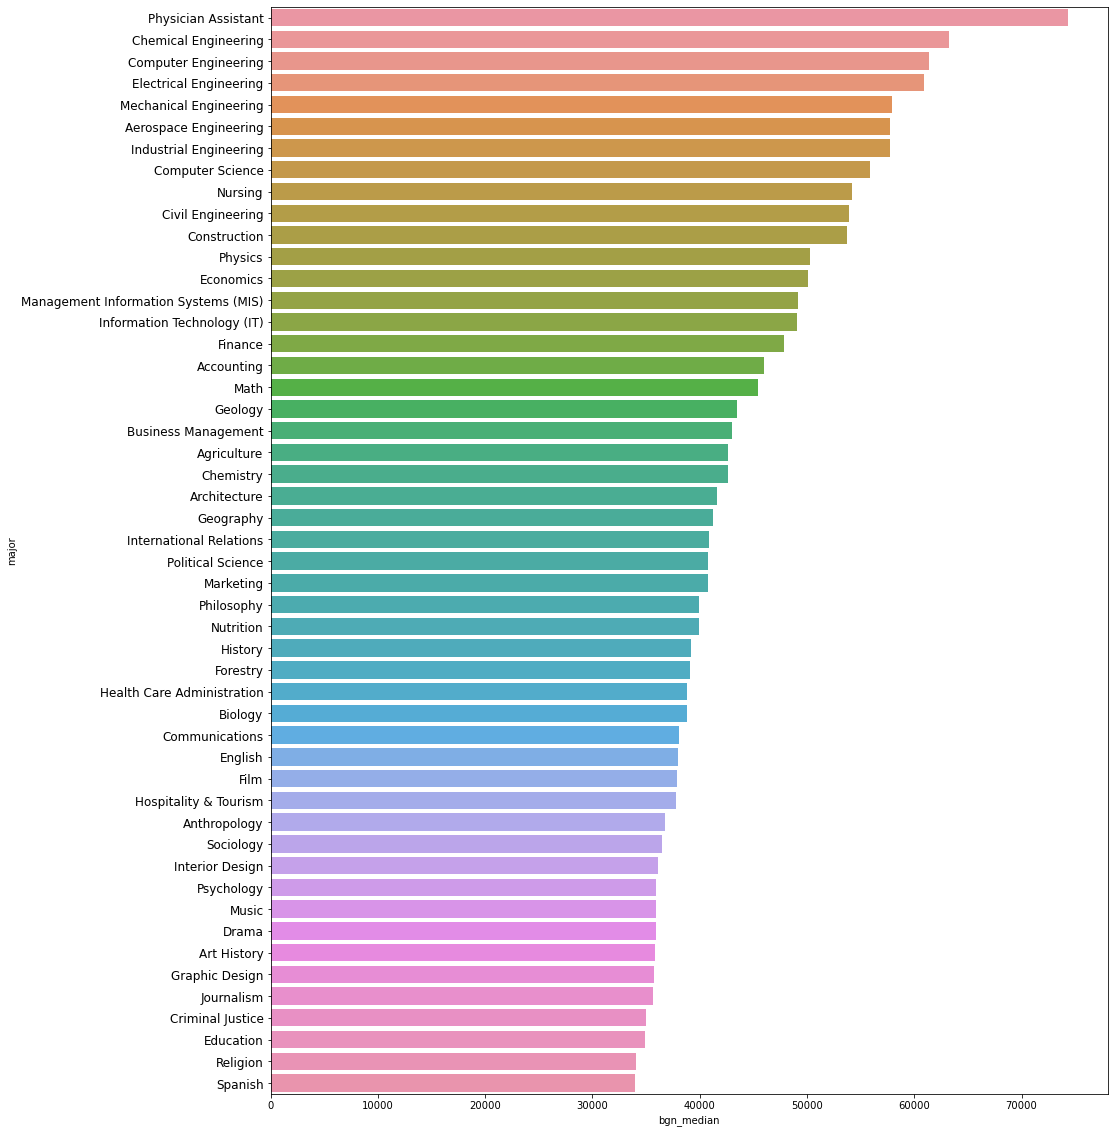

In [15]:
df_deg = df_deg.sort_values("bgn_median", ascending=False).reset_index(drop=True) # Sorting the dataframe by starting median salary
f, ax = plt.subplots(figsize=(15, 20)) 
ax.set_yticklabels(df_deg['major'], rotation='horizontal', fontsize='large')
g = sns.barplot(y = df_deg['major'], x= df_deg['bgn_median'])
plt.show()

## Question 2
#### Which degrees have the best growth by mid-career?

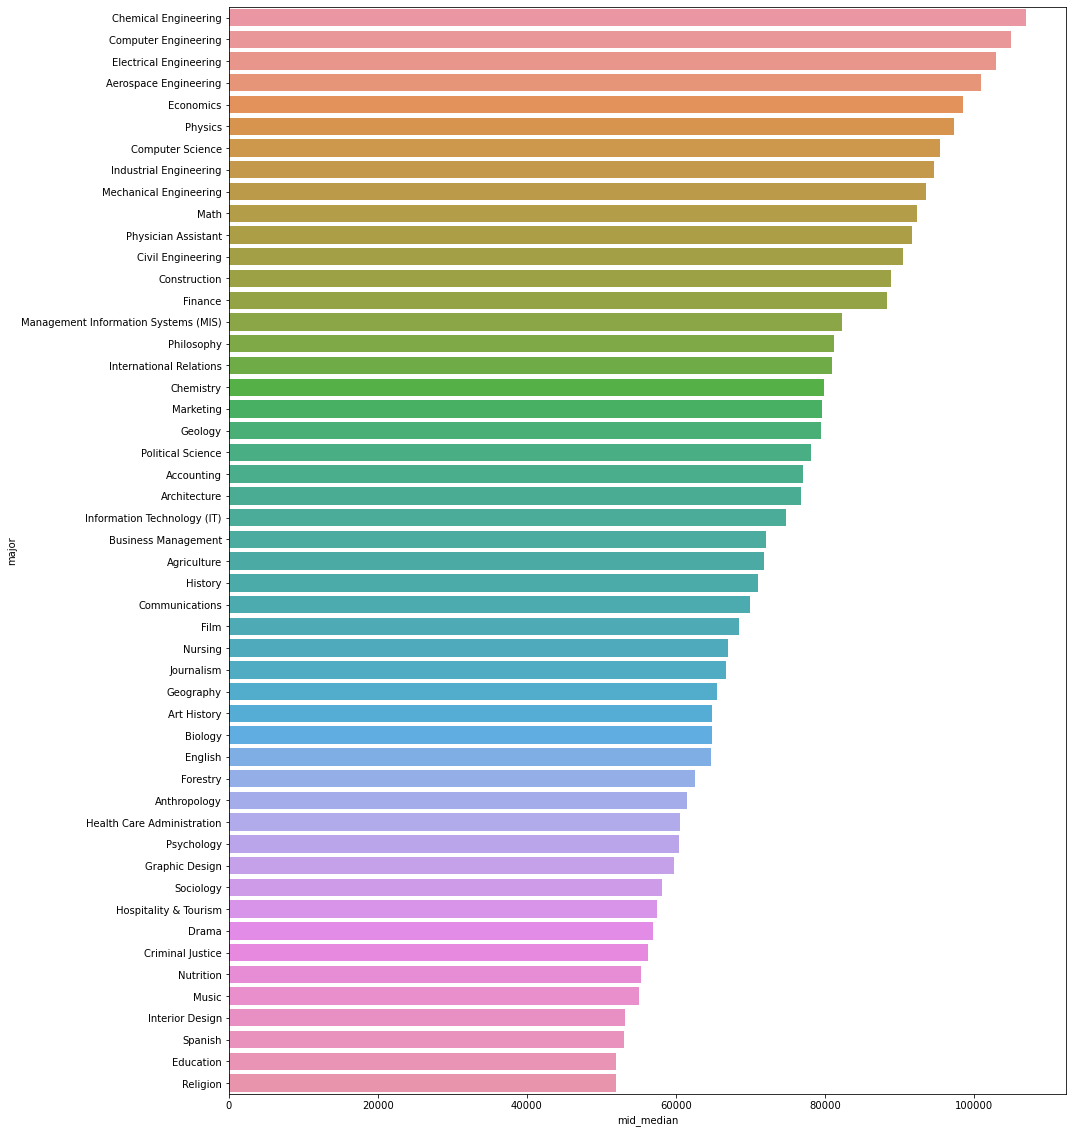

In [16]:
df_deg = df_deg.sort_values("mid_median", ascending=False).reset_index(drop=True) # Sorting by mid-career median salary
plt.figure(figsize=(15, 20)) 
ax.set_yticklabels(df_deg['major'], rotation='horizontal', fontsize='large')
g = sns.barplot(y = df_deg['major'], x= df_deg['mid_median'])
plt.show()

#### Lets compare the growth 

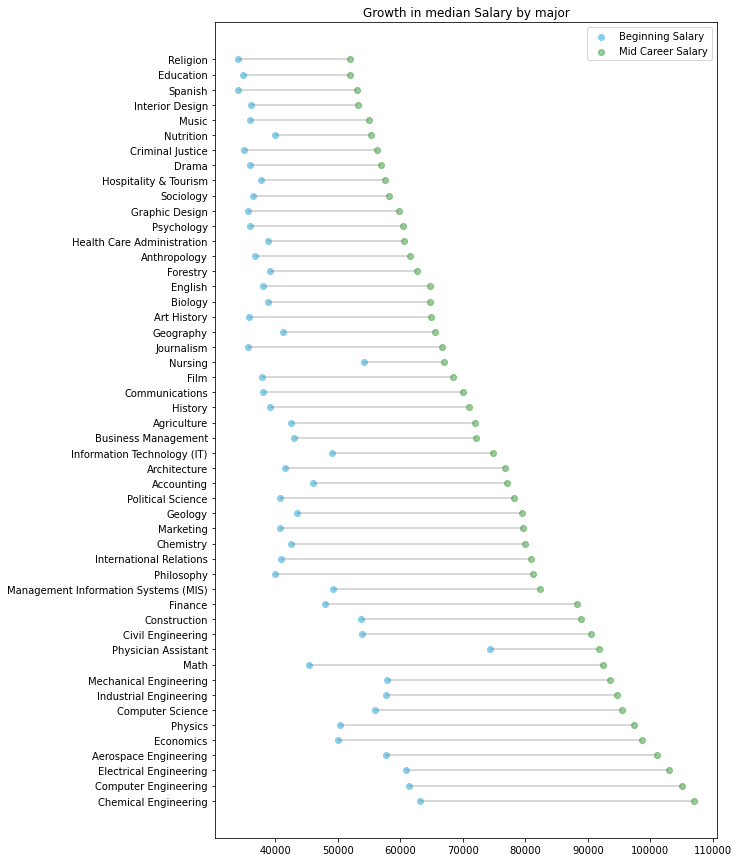

In [17]:
plt.figure(figsize = (9, 15))
df_deg.sort_values("bgn_median", ascending=False).reset_index(drop=True)
my_range=range(1,len(df_deg.index)+1)


plt.hlines(y=my_range, xmin=df_deg['bgn_median'], xmax=df_deg['mid_median'], color='grey', alpha=0.4)
plt.scatter(df_deg['bgn_median'], my_range, color='skyblue', alpha=1, label='Beginning Salary')
plt.scatter(df_deg['mid_median'], my_range, color='green', alpha=0.4 , label='Mid Career Salary')
plt.legend()

plt.yticks(my_range, df_deg['major'])
plt.title('Growth in median Salary by major')

plt.show()

## Question 3

#### What is the growth and spread of salaries like by mid-career for each major?

In [18]:
df_deg.head()

,major,bgn_median,mid_median,delta_bgn_mid,mid_p10,mid_p25,mid_p75,mid_p90
0,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
1,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
2,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
3,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
4,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0


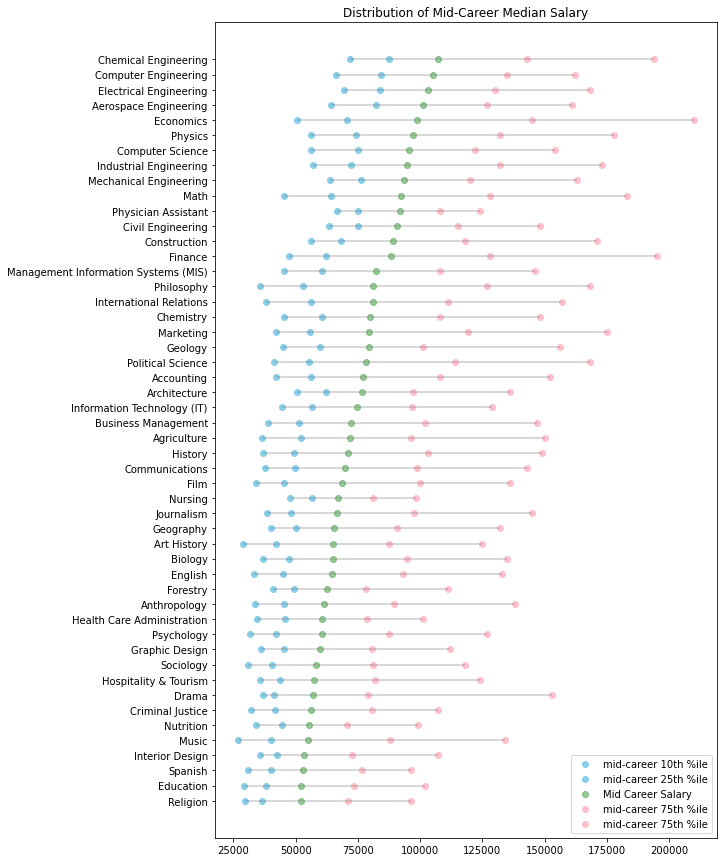

In [19]:
plt.figure(figsize = (9, 15))
df_deg = df_deg.sort_values("mid_median").reset_index(drop=True)
my_range=range(1,len(df_deg.index)+1)


plt.hlines(y=my_range, xmin=df_deg['mid_p10'], xmax=df_deg['mid_p90'], color='grey', alpha=0.4)
plt.scatter(df_deg['mid_p10'], my_range, color='skyblue', alpha=1, label='mid-career 10th %ile')
plt.scatter(df_deg['mid_p25'], my_range, color='skyblue', alpha=1, label='mid-career 25th %ile')
plt.scatter(df_deg['mid_median'], my_range, color='green', alpha=0.4 , label='Mid Career Salary')
plt.scatter(df_deg['mid_p75'], my_range, color='pink', alpha=1, label='mid-career 75th %ile')
plt.scatter(df_deg['mid_p90'], my_range, color='pink', alpha=1, label='mid-career 75th %ile')
plt.legend()

plt.yticks(my_range, df_deg['major'])
plt.title('Distribution of Mid-Career Median Salary')

plt.show()

#### Lets look at which major has the largest range in the 10th to 90th percentiles of the mid-career salaries

In [20]:
range_major = df_deg[['major', 'mid_p10', 'mid_median', 'mid_p90']]

In [21]:
range_major['range'] = range_major['mid_p90'] - range_major['mid_p10']

<ipython-input-21-c9d161946730>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  range_major['range'] = range_major['mid_p90'] - range_major['mid_p10']


In [22]:
range_major = range_major.sort_values(by = 'range', ascending = False)

In [23]:
range_major.head(10)

,major,mid_p10,mid_median,mid_p90,range
45,Economics,50600.0,98600.0,210000.0,159400.0
36,Finance,47200.0,88300.0,195000.0,147800.0
40,Math,45200.0,92400.0,183000.0,137800.0
31,Marketing,42100.0,79600.0,175000.0,132900.0
34,Philosophy,35500.0,81200.0,168000.0,132500.0
29,Political Science,41200.0,78200.0,168000.0,126800.0
49,Chemical Engineering,71900.0,107000.0,194000.0,122100.0
44,Physics,56000.0,97300.0,178000.0,122000.0
33,International Relations,38200.0,80900.0,157000.0,118800.0
7,Drama,36700.0,56900.0,153000.0,116300.0
